In [11]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import os

Max Peaks: [    92    192    302 ... 999786 999886 999986]
Min Peaks: [    36    197    327 ... 999577 999721 999907]


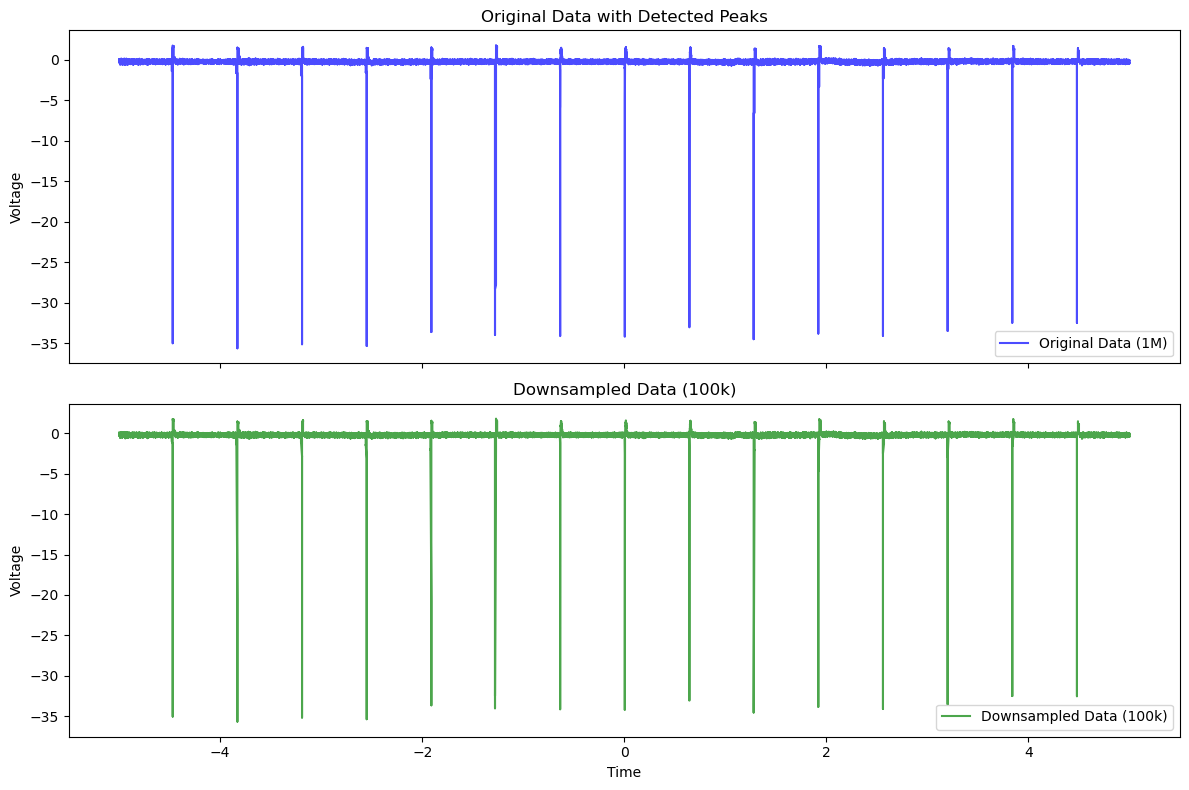

In [27]:

# 파일 경로
file_path = r"c:\Users\limye\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\2. Leaf inspired DEG\0. 실험자료\2. Collecting data\250312_하이드로젤 크게\night\f11.csv"

# 데이터 로드 (헤더 없음)
df = pd.read_csv(file_path, header=None)

# NaN 값 제거 및 컬럼 이름 지정
df.iloc[:30, 1] = np.nan
df.columns = ["Time", "Voltage"]
df = df.astype(float)  # 데이터 타입 변환

peaks_max, _ = find_peaks(df["Voltage"], height=None, distance=100)
peaks_min, _ = find_peaks(-df["Voltage"], height=None, distance=100)

# 피크 검출 (최대 및 최소)
#peaks_max, _ = find_peaks(df["Voltage"], height=np.percentile(df["Voltage"], 70), distance=100)
#peaks_min, _ = find_peaks(-df["Voltage"], height=np.percentile(-df["Voltage"], 95), distance=100)

# 피크 합치기
peaks = np.sort(np.concatenate((peaks_max, peaks_min)))

# 피크 주변 데이터 유지 (예: 피크 전후 3개 데이터 추가)
peak_indices = []
for peak in peaks:
    start = max(0, peak - 3)
    end = min(len(df) - 1, peak + 3)
    peak_indices.extend(range(start, end + 1))
peak_indices = np.unique(peak_indices)  # 중복 제거

# 목표 샘플 개수
num_samples = 100000

# 피크 개수 확인
num_peaks = len(peak_indices)

if num_peaks >= num_samples:
    # 피크 개수가 충분하면 일부만 선택
    selected_indices = np.sort(np.random.choice(peak_indices, num_samples, replace=False))
else:
    # 피크 유지, 나머지는 균등 샘플링
    num_non_peak_samples = num_samples - num_peaks
    non_peak_indices = np.setdiff1d(np.arange(len(df)), peak_indices)
    
    # 균등 샘플링
    selected_non_peaks = np.linspace(0, len(non_peak_indices) - 1, num_non_peak_samples, dtype=int)
    selected_non_peaks = non_peak_indices[selected_non_peaks]

    # 최종 선택된 인덱스
    selected_indices = np.sort(np.concatenate((peak_indices, selected_non_peaks)))

# 필터링된 데이터
filtered_df = df.iloc[selected_indices]


print("Max Peaks:", peaks_max)
print("Min Peaks:", peaks_min)

# 그래프 설정
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1. 원본 데이터 그래프
axes[0].plot(df["Time"], df["Voltage"], label="Original Data (1M)", color='blue', alpha=0.7)
#axes[0].scatter(df["Time"].iloc[peaks], df["Voltage"].iloc[peaks], color='red', marker='o', label="Detected Peaks")
axes[0].set_title("Original Data with Detected Peaks")
axes[0].set_ylabel("Voltage")
axes[0].legend()

# 2. 축소된 데이터 그래프
axes[1].plot(filtered_df["Time"], filtered_df["Voltage"], label="Downsampled Data (100k)", color='green', alpha=0.7)
axes[1].set_title("Downsampled Data (100k)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Voltage")
axes[1].legend()

plt.tight_layout()
plt.show()

In [26]:
# 기존 local_path에서 폴더 경로 및 원래 파일명 추출
folder_path = os.path.dirname(file_path)
original_filename = os.path.basename(file_path)  # 원래 파일명 가져오기
filtered_file_name = f"minimized_{original_filename}"  # "extracted_" 추가
filtered_file_path = os.path.join(folder_path, filtered_file_name)

# CSV 파일 저장
filtered_df.to_csv(filtered_file_path, index=False)
print(f"Filtered data saved at: {filtered_file_path}")

# 필터링된 데이터 개수 확인
print(filtered_df.shape)

Filtered data saved at: c:\Users\limye\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\2. Leaf inspired DEG\0. 실험자료\2. Collecting data\250312_하이드로젤 크게\night\minimized_f11.csv
(100000, 2)
